Однопараметрический анализ 1
1. Используя аналитические методы продолжения по параметру, построить зависимость стационарных решений хс и ус от параметра k1 (k2) для нескольких
значений параметра k1 : 0,001, 0,005, 0,01, 0,015 и 0,02.
2. Используя аналитические методы продолжения по параметру, построить
зависимость стационарных решений хс и ус от параметра k1 (k2) для нескольких значений параметра k3 : 0.0005, 0.001, 0.002, 0.003 и 0.004.
3. Исследуя след и определитель матрицы Якоби на стационаре, найти точки бифуркаций, уточнить их и отметить на графиках.

Двухпараметрический анализ
1. На плоскости параметров (k1,k2), или (k1,k1), или (k1,k2) построить
параметрический портрет системы, провести линии кратности и нейтральности. Найти и отметить точки бифуркации ко-размерности-2: С (трехкратный корень) и ТВ (Такенса−Богданова, когда два собственных значения равны нулю).
2. Задать параметры из области автоколебаний. С помощью стандартных программ численного интегрирования систем ОДУ в среде Мatlab решить систему (1), задав некоторые начальные данные. Нарисовать графики установившихся колебаний х(t) и у(t). На фазовой плоскости построить фазовый портрет системы: отметить стационарную точку, нарисовать предельный цикл, нарисовать несколько траекторий, которые наматываются на цикл.

In [47]:
import sympy
from scipy.integrate import odeint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# sympy.init_session()
sympy.init_printing()

In [48]:
from sympy.abc import x, y
from sympy.utilities.lambdify import lambdify
k1, k2, k_1, k3, k_3 = sympy.symbols('k_1 k_2 k_{-1} k_3 k_{-3}')
f1 = k1 * (1 - x - y) - k_1 * x - k2 * (1 - x - y)**2 * x
f2 = k3 * (1 - x - y) - k_3 * y
scalars = {
    "k1":0.12,
    "k_1":0.005,
    "k3":0.0032,
    "k2":1.05,
    "k_3":0.002,
}
def filter_z(arr1, arr2):
    res1, res2 = [], []
    for a1, a2 in zip(arr1, arr2):
        if a1 + a2 <= 1 and a1 + a2 >= 0:
            res1.append(a1)
            res2.append(a2)
    return np.array(res1), np.array(res2)

In [175]:
f2_diffs = [sympy.diff(f2,x),sympy.diff(f2, y), sympy.diff(f2, x, x), sympy.diff(f2, y, y), sympy.diff(f2, x, y)]
f2_diffs

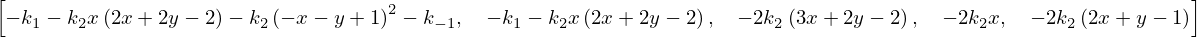

In [174]:
f1_diffs = [sympy.diff(f1,x),sympy.diff(f1, y), sympy.diff(f1, x, x), sympy.diff(f1, y, y), sympy.diff(f1, x, y)]
f1_diffs

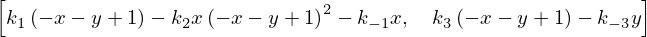

In [51]:
[f1, f2]

Присутствуют предельные циклы по критерию Бендиксона

$$y(x) = (1-x)\frac{k_3}{k_3 + k_{-3}}$$
$$k_1 = \frac{k_{-1} + k_2 x (1-x-y)^2}{1-x-y}$$


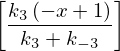

In [52]:
y_by_x = sympy.solvers.solve(f2, y)
y_by_x

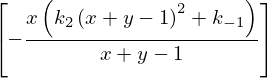

In [53]:
k1_from_f = sympy.solvers.solve(f1, k1)
k1_from_f

In [54]:
A = sympy.Matrix([k1 * (1-x-y) - k_1 * x - k2 * (1-x-y)**2 * x, k3 * (1-x-y) - k_3 * y])
Y = sympy.Matrix([x, y])

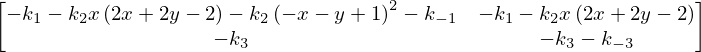

In [55]:
A = A.jacobian(sympy.Matrix([x, y]))
A

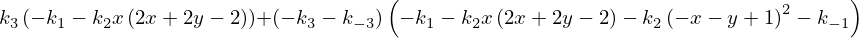

In [56]:
det_A = A.det()
det_A

In [57]:
S_A = A.trace()
S_A

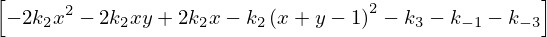

In [58]:
k1_S_a = sympy.solvers.solve(S_A, k1)
k1_S_a

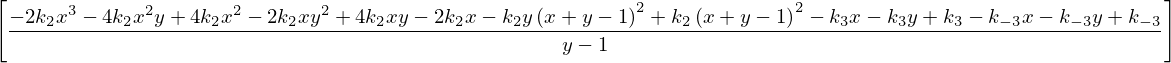

In [59]:
k_1_S_a = sympy.solvers.solve(k1_from_f[0] - k1_S_a[0], k_1)
k_1_S_a

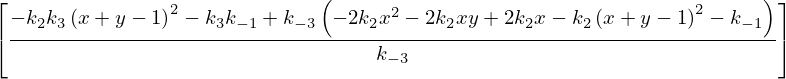

In [60]:
k1_det_A = sympy.solvers.solve(det_A, k1)
k1_det_A

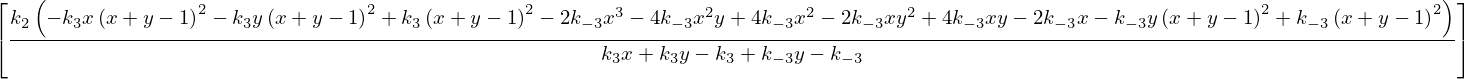

In [61]:
k_1_det_A = sympy.solvers.solve(k1_from_f[0] - k1_det_A[0], k_1)
k_1_det_A

In [62]:
np_x = np.linspace(0, 1, 500)
np_y_by_x = lambdify([x, k3, k_3], y_by_x, 'numpy')

In [63]:
np_y = np_y_by_x(np_x, scalars['k3'], scalars['k_3'])[0]

In [64]:
np_x, np_y = filter_z(np_x , np_y)

In [65]:
np_k_1_S_A = np.zeros(np_x.shape)

In [66]:
for i, x_y in enumerate(zip(np_x, np_y)):
    np_k_1_S_A[i] = k_1_S_a[0].subs({x:x_y[0], y:x_y[1], k2:scalars['k2'], k3:scalars['k3'],k_3:scalars['k_3']})

In [67]:
np_k1_S_A = np.zeros(np_x.shape)

In [68]:
for i, x_y_k_1 in enumerate(zip(np_x, np_y, np_k_1_S_A)):
    np_k1_S_A[i] = k1_from_f[0].subs({x:x_y_k_1[0], y:x_y_k_1[1], k2:scalars['k2'], k_1:x_y_k_1[2]})

In [69]:
np_k_1_det_A = np.zeros(np_x.shape)
for i, x_y in enumerate(zip(np_x, np_y)):
    np_k_1_det_A[i] = k_1_det_A[0].subs({x:x_y[0], y:x_y[1], k2:scalars['k2'], k3:scalars['k3'],k_3:scalars['k_3']})
    
np_k1_det_A = np.zeros(np_x.shape)
for i, x_y_k_1 in enumerate(zip(np_x, np_y, np_k_1_det_A)):
    np_k1_det_A[i] = k1_from_f[0].subs({x:x_y_k_1[0], y:x_y_k_1[1], k2:scalars['k2'], k_1:x_y_k_1[2]})

In [71]:
eig1, eig2 = A.eigenvals()
tbs = []
C = []
for x_i, y_i, k1_S_A, k_1_S_A in zip(np_x, np_y, np_k1_S_A, np_k_1_S_A):
    e1 =  eig1.subs({x:x_i, y:y_i, k2:scalars['k2'], k3:scalars['k3'], k_3:scalars['k_3'], k1:k1_S_A, k_1:k_1_S_A})
    e2 = eig2.subs({x:x_i, y:y_i, k2:scalars['k2'], k3:scalars['k3'], k_3:scalars['k_3'], k1:k1_S_A, k_1:k_1_S_A})
    if e1.is_real and e2.is_real and e1<10e-4 and e2<10e-4:
        tbs.append([k1_S_A, k_1_S_A])
            

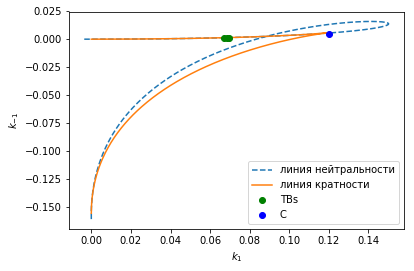

In [72]:
plt.plot(np_k1_S_A, np_k_1_S_A,"--", label = "линия нейтральности")
plt.plot(np_k1_det_A, np_k_1_det_A, label = "линия кратности")
plt.xlabel("$k_1$")
plt.ylabel("$k_{-1}$")
plt.plot(*zip(*tbs), marker='o', color='g', label = 'TBs', ls='')
plt.plot(0.12, 0.005, marker='o', color='b', label = 'C', ls='')
plt.legend()

$k_{-1} = 0.01$,

In [73]:
#np_x
#np_y
def one_param_k_1(k_1_single_param):
    k1_single_param = []
    S_A_single_param = []
    det_A_single_param = []
    for i in range(len(np_x)):
        k1_single_param.append(k1_from_f[0].subs({x:np_x[i], y:np_y[i], k_1:k_1_single_param, k2:scalars['k2']}))
        S_A_single_param.append(S_A.subs({k1:k1_single_param[i], k_1:k_1_single_param, x:np_x[i], y:np_y[i],k3:scalars['k3'],k_3:scalars['k_3'],
                    k2:scalars['k2']}))
        det_A_single_param.append(det_A.subs({
            k1:k1_single_param[i], k_1:k_1_single_param, x:np_x[i], y:np_y[i],k3:scalars['k3'],k_3:scalars['k_3'],
                    k2:scalars['k2']}
        ))
    plt.plot(k1_single_param ,np_x, label = 'x')
    plt.plot(k1_single_param, np_y, label = 'y')
    saddle_nodes = []
    hops = []
    #todo fix it, NoNe here
    for i in range(1, len(np_x)-1):
        if S_A_single_param[i-1] * S_A_single_param[i] <= 0:
            hops.append([k1_single_param[i],np_x[i]])
            hops.append([k1_single_param[i],np_y[i]])

        if det_A_single_param[i-1] * det_A_single_param[i] <= 0:
            saddle_nodes.append([k1_single_param[i],np_x[i]])
            saddle_nodes.append([k1_single_param[i],np_y[i]])
    plt.plot(*zip(*hops), marker='o', color='r', label='hops', ls='')
    plt.plot(*zip(*saddle_nodes), marker='o', color='g', label='saddle node', ls='')
    plt.xlabel('k1')
    plt.ylabel('x,y')
    plt.legend()

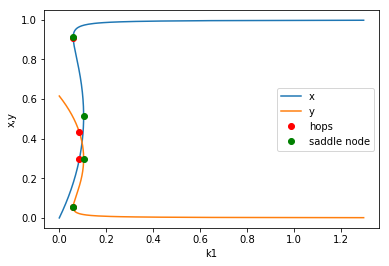

In [74]:
one_param_k_1(0.001)

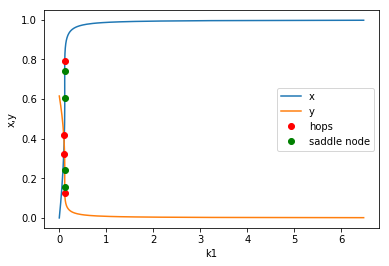

In [75]:
one_param_k_1(0.005)

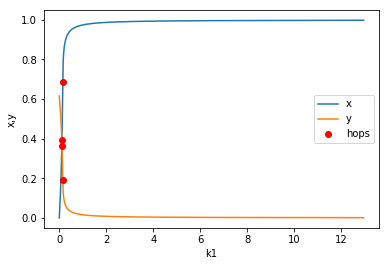

In [76]:
one_param_k_1(0.01)

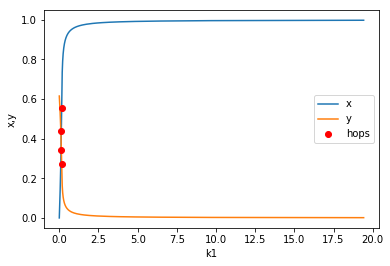

In [77]:
one_param_k_1(0.015)

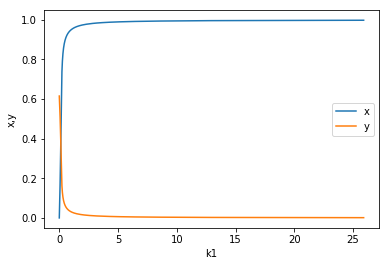

In [78]:
one_param_k_1(0.02)

In [79]:
def one_param_k_3(k_3_single_param):
    k1_single_param = []
    S_A_single_param = []
    det_A_single_param = []
    np_x = np.linspace(0, 1, 500)
    np_y_by_x = lambdify([x, k3, k_3], y_by_x, 'numpy')
    np_y = np_y_by_x(np_x, scalars['k3'], k_3_single_param)[0]
    for i in range(len(np_x)):
        k1_single_param.append(k1_from_f[0].subs({x:np_x[i], y:np_y[i], k_1:scalars['k_1'], k2:scalars['k2']}))
        S_A_single_param.append(S_A.subs({k1:k1_single_param[i], k_1:scalars['k_1'], x:np_x[i], y:np_y[i],k3:scalars['k3'],k_3:k_3_single_param,
                    k2:scalars['k2']}))
        det_A_single_param.append(det_A.subs({
            k1:k1_single_param[i], k_1:scalars['k_1'], x:np_x[i], y:np_y[i],k3:scalars['k3'],k_3:k_3_single_param,
                    k2:scalars['k2']}
        ))
    plt.plot(k1_single_param ,np_x, label = 'x')
    plt.plot(k1_single_param, np_y, label = 'y')
    saddle_nodes = []
    hops = []
    #todo fix it
    for i in range(1, len(np_x)-1):
        if S_A_single_param[i-1] * S_A_single_param[i] <= 0:
            hops.append([k1_single_param[i],np_x[i]])
            hops.append([k1_single_param[i],np_y[i]])

        if det_A_single_param[i-1] * det_A_single_param[i] <= 0:
            saddle_nodes.append([k1_single_param[i],np_x[i]])
            saddle_nodes.append([k1_single_param[i],np_y[i]])
    plt.plot(*zip(*hops), marker='o', color='r', label='hops', ls='')
    plt.plot(*zip(*saddle_nodes), marker='o', color='g', label='saddle node', ls='')
    plt.xlabel('k1')
    plt.ylabel('x,y')
    plt.legend()

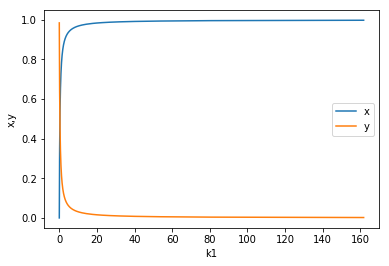

In [80]:
one_param_k_3(0.00005)

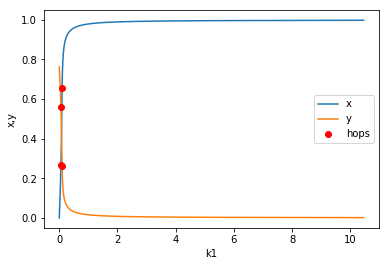

In [81]:
one_param_k_3(0.001)

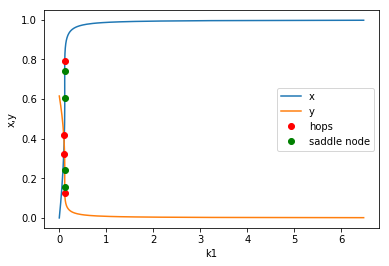

In [82]:
one_param_k_3(0.002)

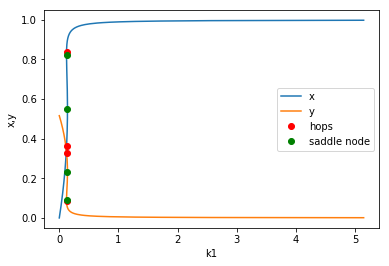

In [83]:
one_param_k_3(0.003)

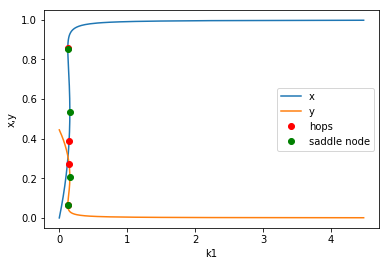

In [84]:
one_param_k_3(0.004)

In [275]:
def pend(y, t, k1_p, k_1_p, k2_p, k3_p, k_3_p):
    y1, y2 = y
    dydt = [(1 - y1 -y2) * k1_p - k_1_p * y1 - k2_p * (1-y1-y2)**2 *y1, k3_p * (1-y1-y2)**2 - k_3_p*y2**2]
    return dydt

t = np.linspace(0, 10000, 1000)
y0 = [0.2,0.2]
sol = odeint(pend, y0, t, args=(0.13, 0.01, scalars['k2'], scalars['k3'], scalars['k_3']))


Text(0.5, 1.0, 'автоколебания')

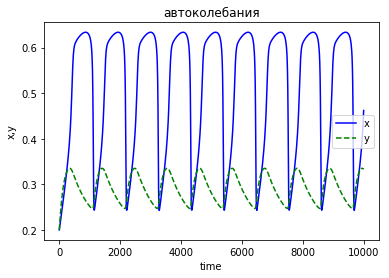

In [276]:
plt.plot(t, sol[:, 0], 'b', label='x')
plt.plot(t, sol[:, 1], 'g--', label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('x,y')
plt.title('автоколебания')

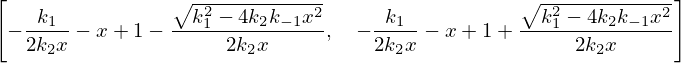

In [277]:
y_by_x_f1 = sympy.solvers.solve(f1, y)
y_by_x_f1


In [278]:
np_y_by_x_f1 = lambdify([x, k1, k_1, k2], y_by_x_f1, 'numpy')
np_y_f1 = np_y_by_x_f1(np_x, 0.13, 0.01, scalars['k2'])

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in add


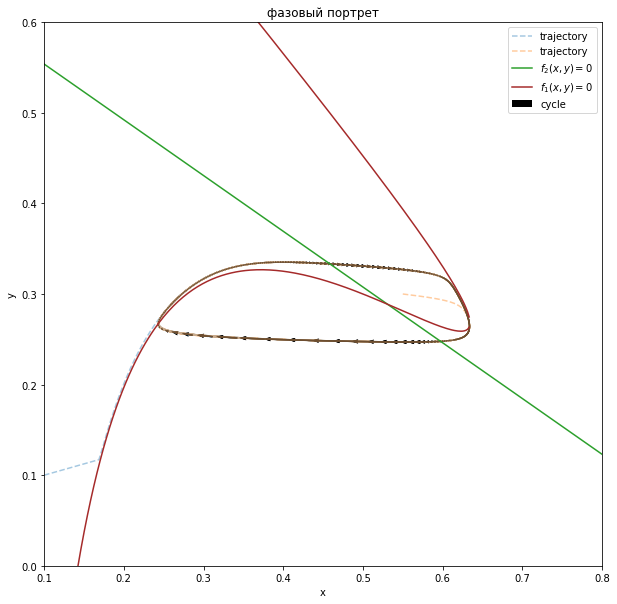

In [288]:
plt.figure(figsize=(10,10))
y02 = [0.1, 0.1]
sol2 = odeint(pend, y02, t, args=(0.13, 0.01, scalars['k2'], scalars['k3'], scalars['k_3']))
y03 = [0.5, 0.3]
sol3 = odeint(pend, y03, t, args=(0.13, 0.01, scalars['k2'], scalars['k3'], scalars['k_3']))
y04 = [0.55, 0.3]
sol4 = odeint(pend, y04, t, args=(0.13, 0.01, scalars['k2'], scalars['k3'], scalars['k_3']))
plt.plot(sol2[:, 0], sol2[:, 1], '--', sol4[:, 0], sol4[:, 1], '--', label = 'trajectory', alpha=0.4)

sol5 = odeint(pend, sol[-1], t, args=(0.13, 0.01, scalars['k2'], scalars['k3'], scalars['k_3']))
plt.xlabel('x')
plt.ylabel('y')
plt.title('фазовый портрет')
plt.plot(np_x, np_y, label = '$f_2(x,y) = 0$')
plt.plot(np_x, np_y_f1[0], color = 'brown', label = '$f_1(x,y) = 0$')
plt.plot(np_x, np_y_f1[1], color = 'brown')
plt.quiver(sol5[:-1, 0], sol5[:-1, 1], sol5[1:, 0]-sol5[:-1, 0], sol5[1:, 1]-sol5[:-1, 1], scale = 2, label = 'cycle')
plt.xlim(0.1,0.8)
plt.ylim(0,0.6)
plt.legend()
